190501V - Ranathunga R.A.C.D.

Github profile link : https://github.com/ChamithDilshan

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Question 01

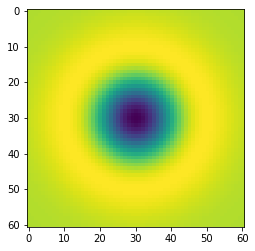

In [3]:
sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw,hw+1,1), np.arange(-hw,hw+1,1))

log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)

Question 02

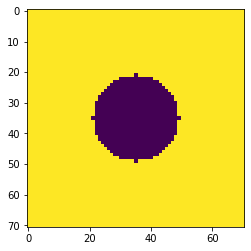

In [4]:
w, h = 71 , 71
hw = w//2
hh = h//2

f = np.ones((h,w), dtype= np.float32)* 255
X, Y = np.meshgrid(np.arange(-hw,hw+1,1), np.arange(-hw,hw+1,1))

r = w//5
f *= X**2 + Y**2 > r** 2
plt.imshow(f)

(35, 35, 5)
10


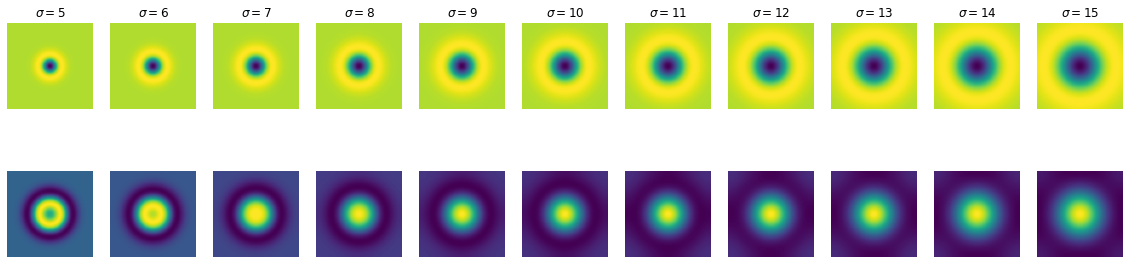

In [5]:
s = 11
fig, ax = plt.subplots(2, s, figsize = (20,5))
scale_space = np.empty((h,w,s), dtype= np.float32)
sigmas = np.arange(5,16,1)
for i , sigma in enumerate(np.arange(5,16,1)):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-hw,hw+1,1), np.arange(-hw,hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1, log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
indices = np.unravel_index(np.argmax(scale_space, axis = None), scale_space.shape)
print(indices)
print(sigmas[indices[2]])


Question 03

True

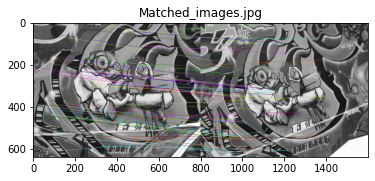

In [12]:
img1 = cv.imread('img1.ppm')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

img2 = cv.imread('img2.ppm')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

Matched = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

plt.imshow(Matched)
plt.title("Matched_images.jpg")
cv.imwrite("Matched_images.jpg", Matched)

Question 04

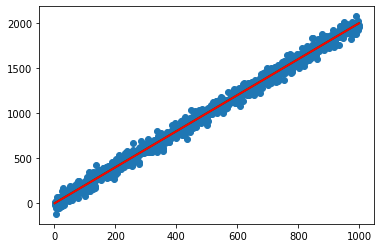

In [7]:
m = 2 # Line equation : y = m*x + c . m i s the s l o p e . c i s the i n t e r c e p t .
c = 1
x = np.arange (1 , 1000 , 1)
sigma = 50
np.random.seed(45)
noise = sigma * np.random.randn(len(x))
o = np.zeros(x.shape)
y = m*x +c +noise + o

n = len(x)
X = np.concatenate([x.reshape(n,1), np.ones((n, 1))], axis = 1)
B = np.linalg.pinv(X.T @ X) @ X.T  @ y
mstar = B[0]
cstar = B[1]

plt.plot(x,y,'o', label='noise points')
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label="True Line")
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + c], color = 'r', linewidth = 2, label="Estimated Line")

Question 05

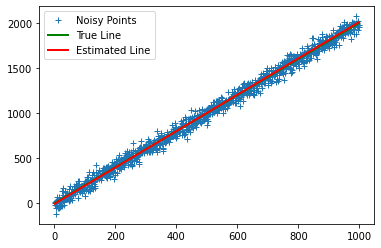

In [8]:
m = 2 
c = 1
x = np.arange (1 , 1000 , 1)
sigma = 50
np.random.seed(45)
noise = sigma * np.random.randn(len(x))
o = np.zeros(x.shape)
y = m*x +c +noise + o

n = len(x)
u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y- np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11, u12], [u21, u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev = V[:, np.argmin(w)]




a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1]
d = a*np.mean(x) + b*np.mean(y)


mstar = -a/b
cstar = d/b

plt.plot(x,y, '+', label = 'Noisy Points')
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label="True Line")
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + c], color = 'r', linewidth = 2, label="Estimated Line")

plt.legend(loc = 'best')
